In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, wilcoxon
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Read data

In [4]:
data = pd.read_csv('reaction_times.csv')

# Find accuracy and mean per congruent and incongruent

In [5]:
avg_incongruent = []
avg_congruent = []
accuracy_incongruent = []
accuracy_congruent = []

for row in data.iterrows():
    acc_incongruent = []
    acc_congruent = []

    mean_incongruent = []
    mean_congruent = []

    for i in range(1, 21):
        print(row[1][i])
        if row[1][i] == False and row[1][i + 40] == "Correct":
            mean_incongruent.append(row[1][i + 20])
            acc_incongruent.append(1)
        elif row[1][i] == False and row[1][i + 40] == "Incorrect":
            acc_incongruent.append(0)
        elif row[1][i] == True and row[1][i + 40] == "Correct":
            mean_congruent.append(row[1][i + 20])
            acc_congruent.append(1)
        elif row[1][i] == True and row[1][i + 40] == "Incorrect":
            acc_congruent.append(0)

    avg_incongruent.append(np.mean(mean_incongruent))
    avg_congruent.append(np.mean(mean_congruent))
    accuracy_incongruent.append(np.sum(acc_incongruent)/len(acc_incongruent))
    accuracy_congruent.append(np.sum(acc_congruent)/len(acc_congruent))

1
M
exercise
29
09:33:36
False
True
False
False
True
False
False
False
True
False
False
False
True
True
True
2
M
exercise
29
09:43:55
True
False
True
True
True
True
False
True
True
True
True
True
True
False
False
1
M
exercise
29
08:04:14
False
False
True
False
True
True
True
True
False
False
True
True
True
True
True
2
M
exercise
29
08:12:49
True
False
False
True
False
True
True
False
False
True
False
True
True
False
True
1
F
exercise
24
09:19:54
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
2
F
exercise
24
09:28:43
False
False
False
True
False
False
False
False
False
False
True
False
False
True
True
1
F
exercise
26
09:35:05
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
2
F
exercise
26
09:43:12
True
True
True
False
False
False
False
False
True
False
False
False
False
True
False
1
F
exercise
25
10:16:02
True
False
False
False
False
False
True
False
True
False
False
False
False
False
True
2
F
exercise
25
10

# Add columns to df

In [26]:
data["avg_incongruent"] = avg_incongruent
data["avg_congruent"] = avg_congruent
data["acc_incongruent"] = accuracy_incongruent
data["acc_congruent"] = accuracy_congruent

# Split into control and exercise group

In [27]:
execise = data[data["group"] == "exercise"]
control = data[data["group"] == "control"]

In [28]:
exercise_1 = execise[execise["trial"] == 1]
control_1 = control[control["trial"] == 1]
exercise_2 = execise[execise["trial"] == 2]
control_2 = control[control["trial"] == 2]

# get mean rt and acc for whole group

In [29]:
rt_exercise_1 = np.mean(exercise_1["avg_incongruent"])
rt_exercise_2 = np.mean(exercise_2["avg_incongruent"])
rt_control_1 = np.mean(control_1["avg_incongruent"])
rt_control_2 = np.mean(control_2["avg_incongruent"])

In [30]:
exerc = [rt_exercise_1, rt_exercise_2]
contr = [rt_control_1, rt_control_2]

Text(0.5, 1.0, 'Reaction time Incongruent by group and trial')

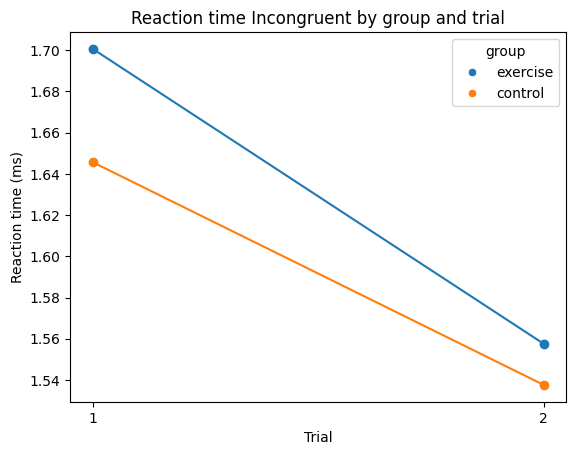

In [31]:
#connect the lines
plt.plot([1, 2], exerc, marker='o')
plt.plot([1, 2], contr, marker='o')
plot_data = pd.DataFrame({
    'trial': [1, 2, 1, 2],
    'reaction_time': exerc + contr,
    'group': ['exercise', 'exercise', 'control', 'control']
})
#add labels 
sns.scatterplot(data=plot_data, x='trial', y='reaction_time', hue='group')
plt.xlabel('Trial')
plt.xticks([1, 2])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time Incongruent by group and trial')


# box plot

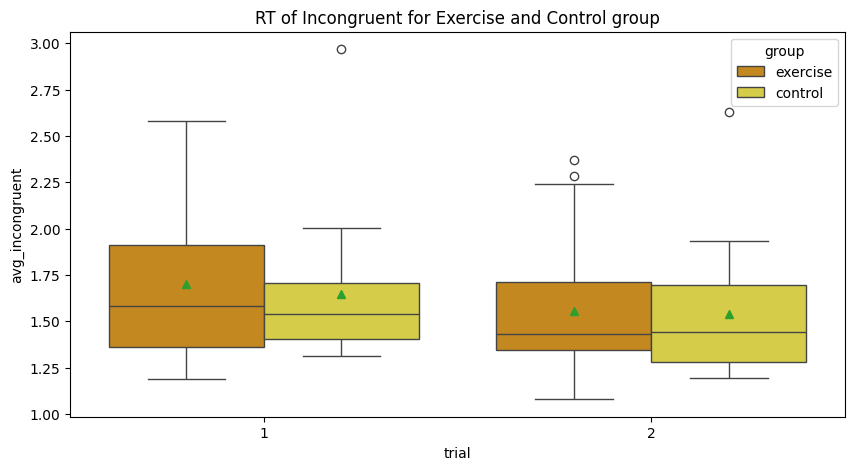

In [32]:
colorblind_palette = sns.color_palette("colorblind")
fig, ax = plt.subplots(figsize=(10, 5))

# Concatenate the exercise and control DataFrames
combined_data = pd.concat([execise, control])

sns.boxplot(x="trial", y="avg_incongruent", data=combined_data, ax=ax, hue='group', palette=[colorblind_palette[1], colorblind_palette[8]], showmeans=True)
ax.set_title("RT of Incongruent for Exercise and Control group")

plt.show()

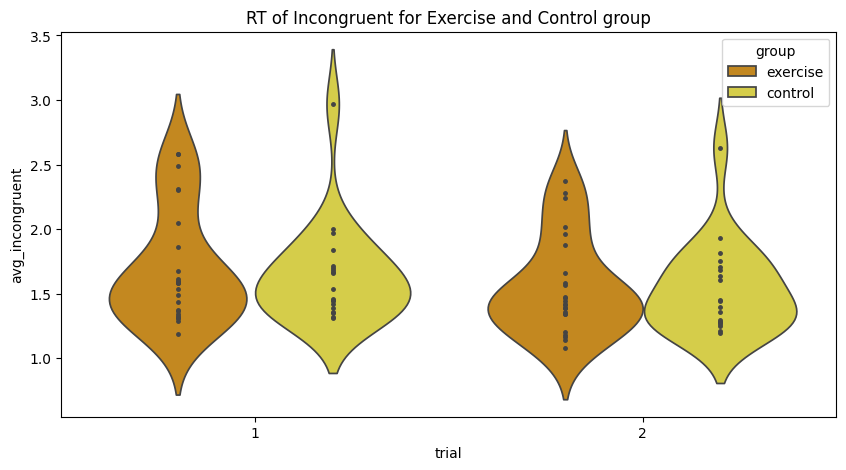

In [47]:
#create a rainplot  
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(x="trial", y="avg_incongruent", data=combined_data, ax=ax, hue='group', palette=[colorblind_palette[1], colorblind_palette[8]], inner='point')
ax.set_title("RT of Incongruent for Exercise and Control group")
plt.show()


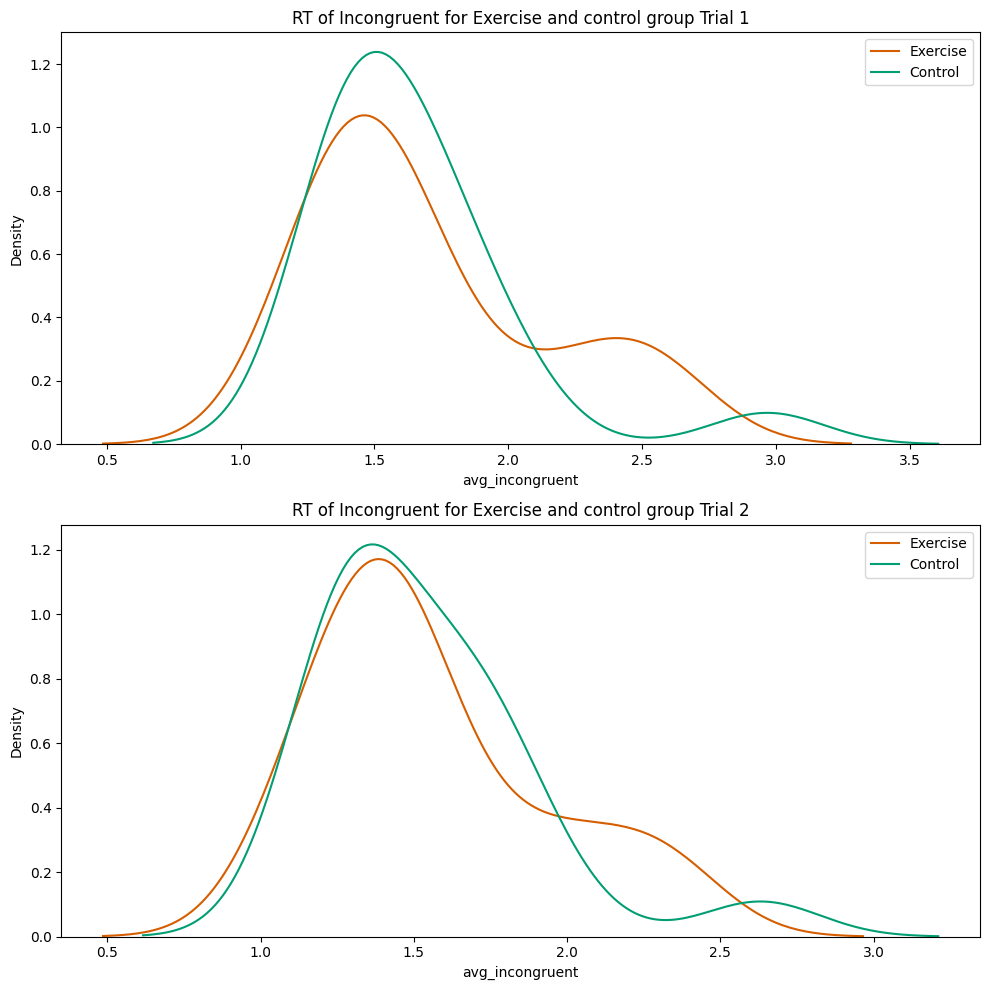

In [34]:
# Assuming execise is your DataFrame and colorblind_palette is defined
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_1["avg_incongruent"], ax=ax[0], color=colorblind_palette[3])
sns.kdeplot(control_1["avg_incongruent"], ax=ax[0], color=colorblind_palette[2])
ax[0].set_title("RT of Incongruent for Exercise and control group Trial 1")
ax[0].legend(["Exercise", "Control"])
# KDE plot for the 'avg_congruent' column
# sns.kdeplot(exercise_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[8])
# sns.kdeplot(control_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[7])
# ax[0,1].set_title("RT of Congruent for Exercise and control group Trial 1")
# ax[0,1].legend(["Exercise", "Control"])

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_2["avg_incongruent"], ax=ax[1], color=colorblind_palette[3])
sns.kdeplot(control_2["avg_incongruent"], ax=ax[1], color=colorblind_palette[2])
ax[1].set_title("RT of Incongruent for Exercise and control group Trial 2")
ax[1].legend(["Exercise", "Control"])

# # KDE plot for the 'avg_congruent' column
# sns.kdeplot(exercise_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[8])
# sns.kdeplot(control_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[7])
# ax[1,1].set_title("RT of Congruent for Exercise and control group Trial 2")
# ax[1,1].legend(["Exercise", "Control"]) 


plt.tight_layout()
plt.show()

In [35]:
print(f"error rate for exercise 1 is  {1- exercise_1.acc_incongruent.mean()}")
print(f"error rate for control 1 is  {1- control_1.acc_incongruent.mean()}")
print(f"error rate for exercise 1 is  {1- exercise_2.acc_incongruent.mean()}")
print(f"error rate for control  1 is  {1- control_2.acc_incongruent.mean()}")

error rate for exercise 1 is  0.011622636622636517
error rate for control 1 is  0.012280701754386003
error rate for exercise 1 is  0.0
error rate for control  1 is  0.022898154477101862


In [36]:
print(f"avg rt for incongruent exercise 1 is {exercise_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 1 is {control_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent exercise 2 is {exercise_2.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 2 is {control_2.avg_incongruent.mean()}")

avg rt for incongruent exercise 1 is 1.7005636160806308
avg rt for incongruent control 1 is 1.64560032092354
avg rt for incongruent exercise 2 is 1.5575631991207215
avg rt for incongruent control 2 is 1.537625580224003


# Testing normality of data

In [37]:
from scipy.stats import shapiro
print(shapiro(exercise_1.avg_incongruent))
print(shapiro(control_1.avg_incongruent))
print(shapiro(exercise_2.avg_incongruent)) 
print(shapiro(control_2.avg_incongruent))

ShapiroResult(statistic=np.float64(0.8407649219869949), pvalue=np.float64(0.0014802672869530572))
ShapiroResult(statistic=np.float64(0.7420656020633203), pvalue=np.float64(0.00018448701925236405))
ShapiroResult(statistic=np.float64(0.8856494047363692), pvalue=np.float64(0.010818555425688738))
ShapiroResult(statistic=np.float64(0.82213799962977), pvalue=np.float64(0.0024409518217772875))


In [38]:
control_total = control_1.shape[0]

exercise_1 = exercise_1.iloc[:control_total]
exercise_2 = exercise_2.iloc[:control_total]
#merge the data
data_balanced = pd.concat([exercise_1, control_1, exercise_2, control_2])


In [39]:
df = data_balanced[["id", "group", "trial", "avg_incongruent"]]

model = smf.mixedlm("avg_incongruent ~ trial * group", df, groups=df["id"]).fit()

print(model.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  avg_incongruent
No. Observations:    76       Method:              REML           
No. Groups:          38       Scale:               0.0198         
Min. group size:     2        Log-Likelihood:      -14.2442       
Max. group size:     2        Converged:           Yes            
Mean group size:     2.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                1.754    0.109 16.054 0.000  1.539  1.968
group[T.exercise]        0.090    0.154  0.581 0.561 -0.213  0.392
trial                   -0.108    0.046 -2.363 0.018 -0.198 -0.018
trial:group[T.exercise] -0.046    0.065 -0.716 0.474 -0.173  0.080
Group Var                0.128    0.325                           



In [40]:
# # Separate data by group
# exercise_group = data[data['group'] == 'exercise']
# control_group = data[data['group'] == 'control']

# # Separate data by trial within each group
# exercise_1 = exercise_group[exercise_group['trial'] == 1]  # trial 1 for exercise group
# exercise_2 = exercise_group[exercise_group['trial'] == 2]  # trial 2 for exercise group
# control_1 = control_group[control_group['trial'] == 1]  # trial 1 for control group
# control_2 = control_group[control_group['trial'] == 2]  # trial 2 for control group

# # --- 1. Mann-Whitney U Test (between-group comparisons) ---
# # Compare the 'avg_incongruent' between exercise and control groups for trial 1 (pre-exercise)
# stat, p_value = mannwhitneyu(exercise_1['avg_incongruent'], control_1['avg_incongruent'])
# print(f"Mann-Whitney U Test (Exercise vs Control - Trial 1):")
# print(f"Statistic: {stat}, p-value: {p_value}\n")

# # Compare the 'avg_incongruent' between exercise and control groups for trial 2 (post-exercise)
# stat, p_value = mannwhitneyu(exercise_2['avg_incongruent'], control_2['avg_incongruent'])
# print(f"Mann-Whitney U Test (Exercise vs Control - Trial 2):")
# print(f"Statistic: {stat}, p-value: {p_value}\n")

# # --- 2. Wilcoxon Signed-Rank Test (within-subject comparisons) ---
# # Compare within the exercise group (trial 1 vs trial 2)
# stat, p_value = wilcoxon(exercise_1['avg_incongruent'], exercise_2['avg_incongruent'])
# print(f"Wilcoxon Signed-Rank Test (Exercise - Trial 1 vs Trial 2):")
# print(f"Statistic: {stat}, p-value: {p_value}\n")

# # Compare within the control group (trial 1 vs trial 2)
# stat, p_value = wilcoxon(control_1['avg_incongruent'], control_2['avg_incongruent'])
# print(f"Wilcoxon Signed-Rank Test (Control - Trial 1 vs Trial 2):")
# print(f"Statistic: {stat}, p-value: {p_value}\n")
